### Instructions

1) Please submit the .ipynb and .pdf file to gradescope

2) Please include your Name and UNI below.

### Name: 
### UNI: 

## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

# Part 1: Neural Network from the scratch
For this part, you are not allowed to use any library other than numpy.

In this part, you will implement the forward pass and backward pass (i.e. the derivates of each
parameter wrt to the loss) with the network image uploaded.

*   The weight matrix for the hidden layer is W1 and has bias b1.
*   The weight matrix for the output layer is W2 and has bias b2.
*   Activation function is sigmoid for both hidden and output layer
*   Loss function is the Mean Squared Error (MSE) loss

Refer to the below dictionary for dimensions for each matrix


In [3]:
np.random.seed(0) # don't change this
weights = {
'W1': np.random.randn(3, 2),
'b1': np.zeros(3),
'W2': np.random.randn(3),
'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [4]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [5]:
#Implement the forward pass - Z2 and Y
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation

    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    # Your code here
    Z1 = X @ weights["W1"].T + weights["b1"]
    H = sigmoid(Z1)
    Z2 = H @ weights["W2"].T + weights["b2"]
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [6]:
# Implement the backward pass - dLdZ1, dLdW1, dLdb1
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]

    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))

    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)

    ones = np.ones((1000))
    dLdb2 = np.dot(ones.T, dLdZ2)
    dLdH = np.dot(dLdZ2.reshape(-1,1), weights['W2'].reshape(-1,1).T)

    # Your code here

    dLdZ1 = dLdH * (sigmoid(Z1)*(1-sigmoid(Z1)))
    dLdW1 = X.T @ dLdZ1
    dLdb1 = ones.T @ dLdZ1

    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }

    return gradients, L

In [7]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [8]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596, -0.00030765, -0.00034768],
       [ 0.00262019, -0.00024188, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.02924923026531869}


Your answers should be close to L = 0.133 and 'b1': array([ 0.00492, -0.000581, -0.00066]).

You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

# Part 2: Neural network to classify images: CIFAR-10

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

The train/test split is 50k/10k.

In [9]:
from tensorflow.keras.datasets import cifar10 #Code to load data, do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

2024-11-14 16:19:36.230431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


170498071/170498071 [==============================] - 2s 0us/step


### 2.1 Plot 50 samples from each class/label from train set on a 10*5 subplot

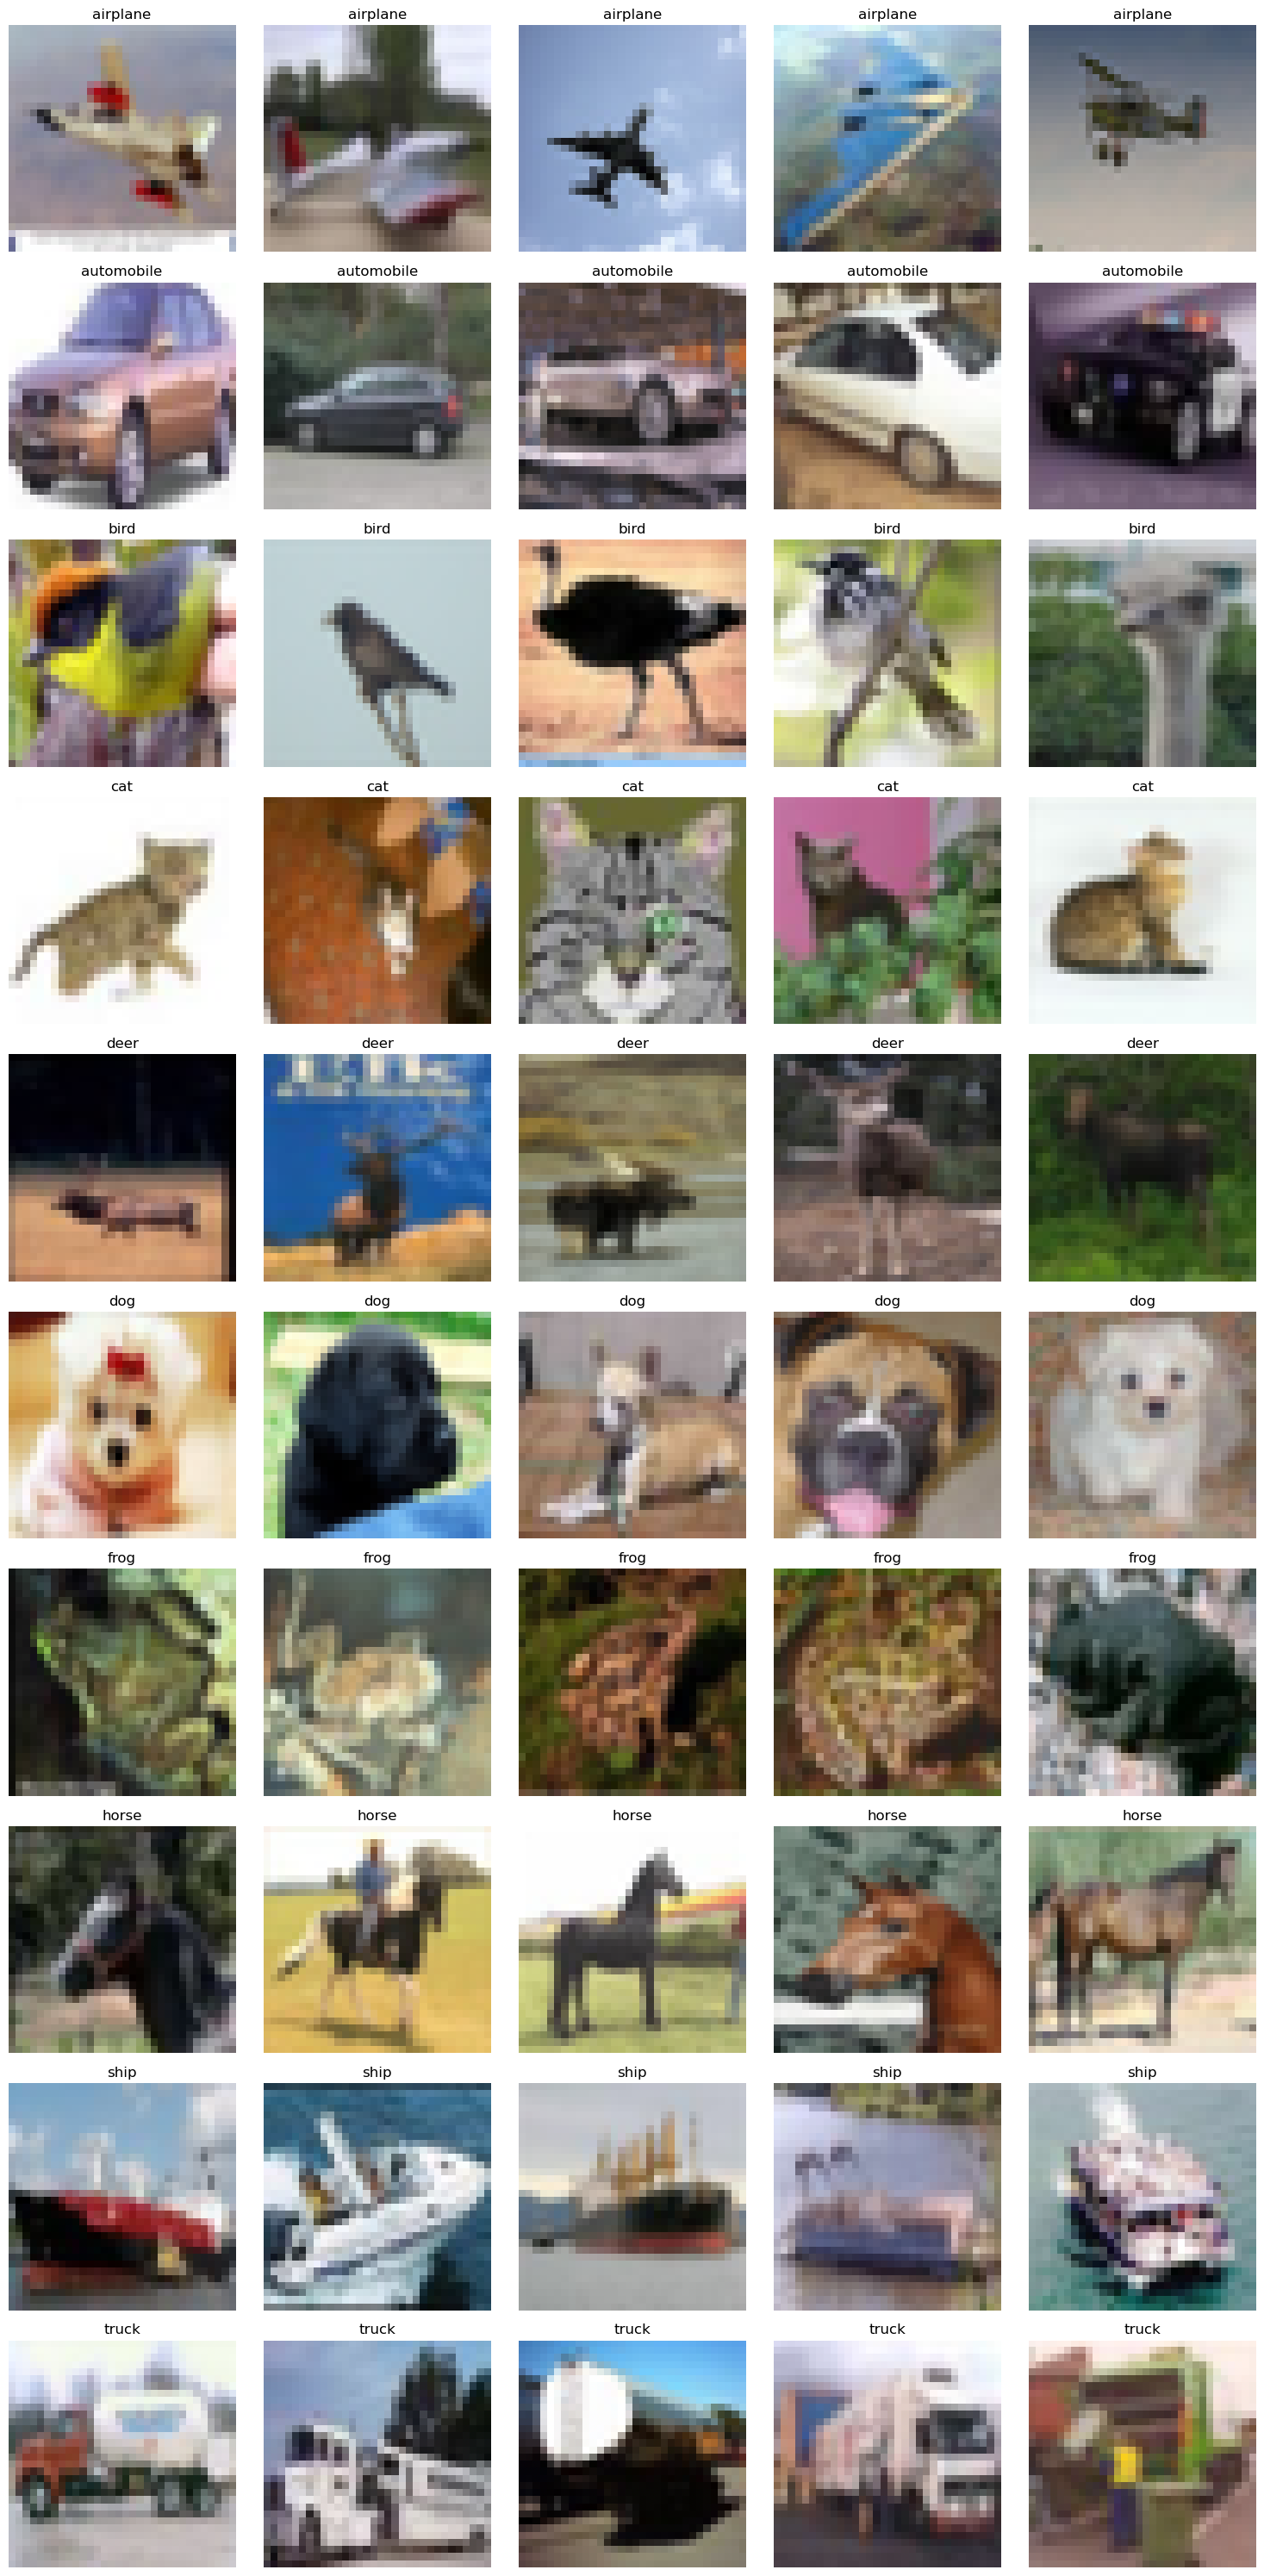

In [11]:
#Your code here

fig, axes = plt.subplots(10, 5, figsize=(15, 30))

for i, label in enumerate(LABELS):
    indices = np.where(y_dev == i)[0]
    selected_indices = np.random.choice(indices, 5, replace=False)
    for j in range(5):
        ax = axes[i, j]
        ax.imshow(x_dev[selected_indices[j]])
        ax.axis('off')
        ax.set_title(LABELS[i])

plt.tight_layout()
plt.show()


### 2.2 Preparing the dataset for NN

1) Print the shapes -  𝑥𝑑𝑒𝑣, 𝑦𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡, 𝑦𝑡𝑒𝑠𝑡

2) Flatten the images into one-dimensional vectors and again print the shapes of  𝑥𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡

3) Standardize the development and test sets.

4) One hot encode your labels

5) Train-test split your development set into train and validation sets (80:20 ratio).

In [14]:
#Your code here
print("x_dev shape:", x_dev.shape)
print("y_dev shape:", y_dev.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_dev shape: (50000, 32, 32, 3)
y_dev shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [15]:
#Your code here
x_dev_flat = x_dev.reshape(x_dev.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("x_dev_flat shape:", x_dev_flat.shape)
print("x_test_flat shape:", x_test_flat.shape)

x_dev_flat shape: (50000, 3072)
x_test_flat shape: (10000, 3072)


In [21]:
#Your code here
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
x_dev_flat = scaler.fit_transform(x_dev_flat)
x_test_flat = scaler.transform(x_test_flat)

In [24]:
#Your code here
encoder = OneHotEncoder(sparse_output=False)
y_dev_encoded = encoder.fit_transform(y_dev)
y_test_encoded = encoder.transform(y_test)

In [25]:
#Your code here
from sklearn.model_selection import train_test_split

x_train_flat, x_val_flat, y_train_encoded, y_val_encoded = train_test_split(x_dev_flat, y_dev_encoded, test_size=0.2, random_state=42)

### 2.3 Build the feed forward network with the below specifications

First layer size = 128

hidden layer size = 64

last layer size = Figure this out from the data!

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#Your code here

model = Sequential([
    Dense(128, activation='relu', input_shape=(3072,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

###2.4 Print out the model summary. Mention the number of parameters for each layer.

In [42]:
#Your code here
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               393344    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


###2.5 Do you think the number of parameters is dependent on the image height and width?

In [43]:
#Your comments here
# Yes, the number of parameters of the model depends on the image height, width, and color channels.
# The input size is equal to height * width * color channels, which is in this case 32 * 32 * 3 = 3072, thus
# the first layer will have 3072 * 128 parameters.

**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output should equal to 1.**

In [44]:
#modify name of X_train based on your requirement

model.compile()
output = model.predict(x_train_flat[0].reshape(1,-1))

print("Output: {:.2f}".format(sum(output[0])))

1/1 [==============================] - 0s 45ms/step
Output: 1.00


###2.6 Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs.

In [45]:
#Your code here
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
training_hist = model.fit(x_train_flat, y_train_encoded, validation_data=(x_val_flat, y_val_encoded), epochs=20, batch_size=64)


Epoch 1/20
625/625 [==============================] - 3s 3ms/step - loss: 1.8008 - accuracy: 0.3737 - val_loss: 1.6446 - val_accuracy: 0.4217
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 1.5494 - accuracy: 0.4528 - val_loss: 1.5914 - val_accuracy: 0.4447
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 1.4489 - accuracy: 0.4869 - val_loss: 1.5192 - val_accuracy: 0.4655
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 1.3710 - accuracy: 0.5141 - val_loss: 1.4955 - val_accuracy: 0.4770
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 1.3112 - accuracy: 0.5389 - val_loss: 1.4885 - val_accuracy: 0.4835
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 1.2604 - accuracy: 0.5576 - val_loss: 1.4946 - val_accuracy: 0.4887
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 1.2110 - accuracy: 0.5724 - val_loss: 1.5108 - val_accuracy: 0.4862
Epoch 

###2.7 Plot the training curves as described below

#### 2.7.1 Display the train vs validation loss over each epoch


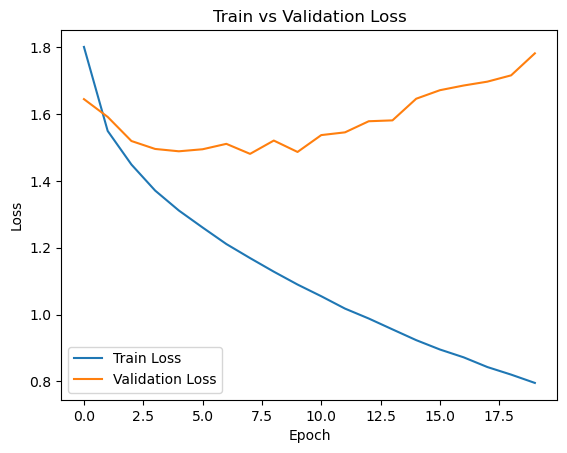

In [46]:
#Your code here
plt.plot(training_hist.history['loss'], label='Train Loss')
plt.plot(training_hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

#### 2.7.2 Display the train vs validation accuracy over each epoch

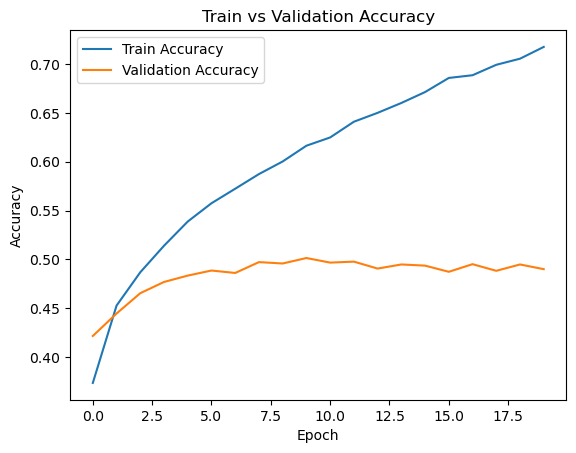

In [47]:
#Your code here
plt.plot(training_hist.history['accuracy'], label='Train Accuracy')
plt.plot(training_hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()

### 2.8 Finally, report the metric chosen on test set

In [50]:
#Your code here

test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_encoded)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 0s 988us/step - loss: 1.7766 - accuracy: 0.4960
Test Accuracy: 49.60%


### 2.9 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

2/2 [==============================] - 0s 2ms/step


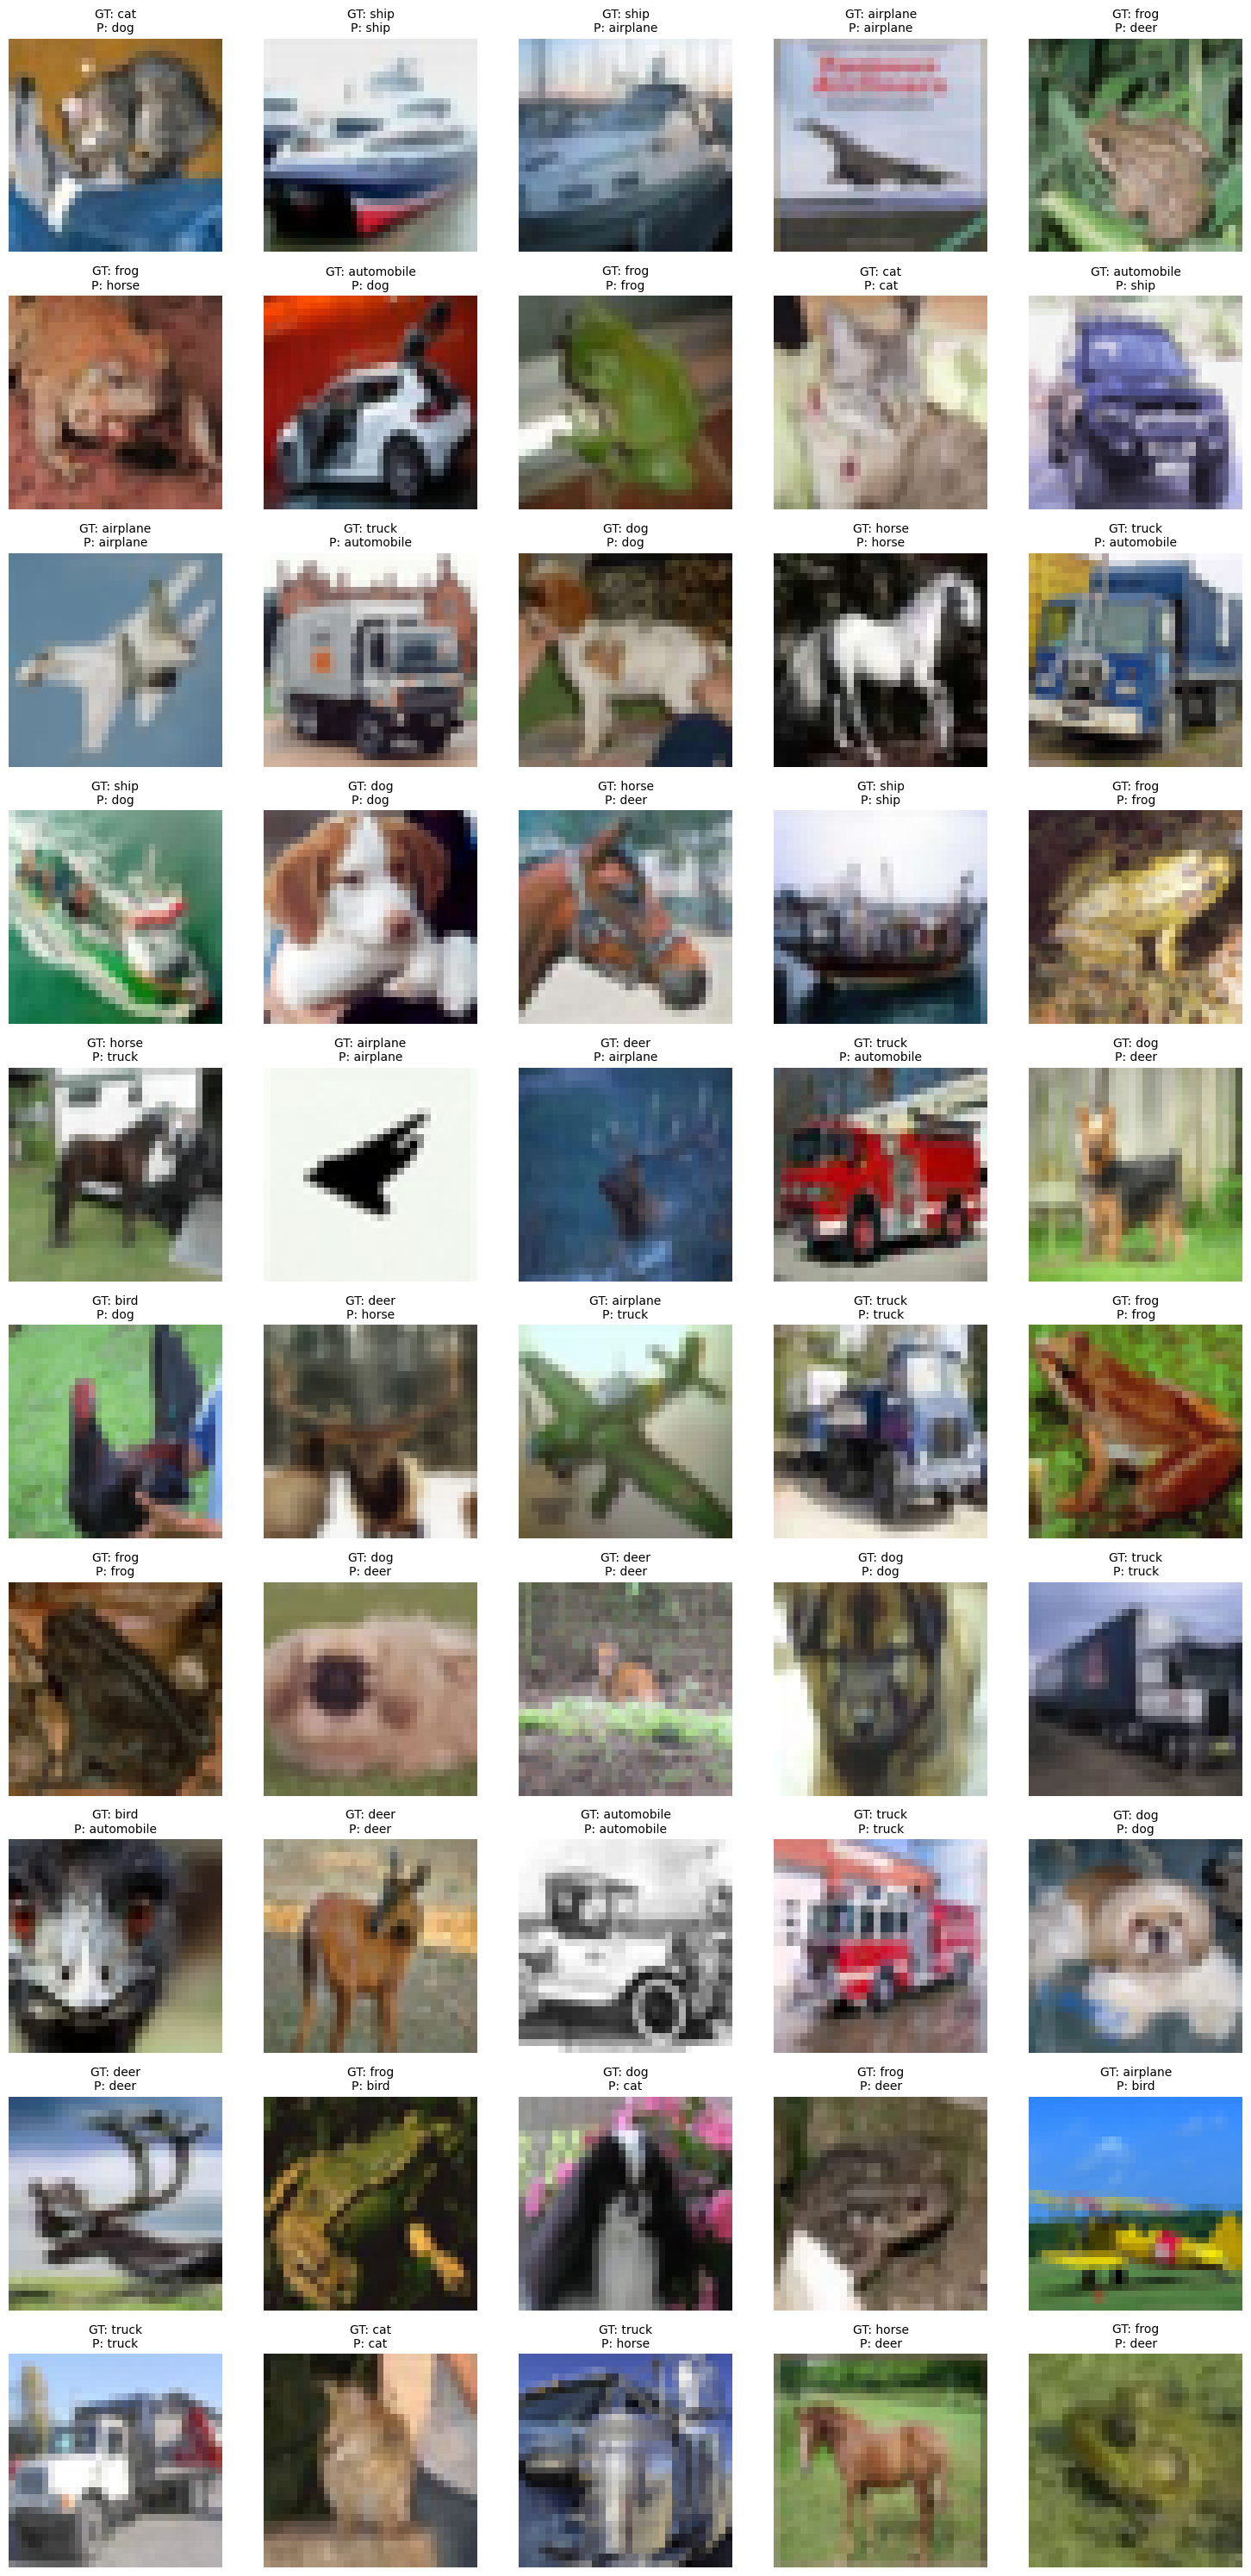

In [57]:
#Your code here

probs = model.predict(x_test_flat[:50])
pred_labels = np.argmax(probs, axis=1)
true_labels = y_test[:,0]


fig, axes = plt.subplots(10, 5, figsize=(15, 30))

for i in range(50):
    ax = axes[i // 5, i % 5]
    ax.imshow(x_test[i])
    ax.axis('off')
    true_label = LABELS[true_labels[i]]
    pred_label = LABELS[pred_labels[i]]
    ax.set_title(f"GT: {true_label}\nP: {pred_label}", fontsize=10)

plt.tight_layout()
plt.show()

# Part 3 - Convolutional Neural Networks

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [59]:
#Code to load the dataset - Do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)

x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


### 3.1 We will be implementing one of the first CNN models put forward by Yann LeCunn, which is commonly referred to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 and padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) Flatten the convolution output to feed it into fully connected layers

6) A fully connected layer with 120 units, ReLU activation

7) A fully connected layer with 84 units, ReLU activation

8) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [62]:
#Your code here
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(16, kernel_size=(5, 5), strides=1, padding='valid', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

### 3.2 Report the model summary

In [63]:
#Your code here
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_22 (Dense)            (None, 120)              

### 3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [67]:
#Your code here
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training_hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64)

Epoch 1/20
625/625 [==============================] - 7s 11ms/step - loss: 1.6764 - accuracy: 0.3895 - val_loss: 1.4803 - val_accuracy: 0.4634
Epoch 2/20
625/625 [==============================] - 7s 10ms/step - loss: 1.3584 - accuracy: 0.5134 - val_loss: 1.3008 - val_accuracy: 0.5380
Epoch 3/20
625/625 [==============================] - 7s 11ms/step - loss: 1.2431 - accuracy: 0.5590 - val_loss: 1.2234 - val_accuracy: 0.5682
Epoch 4/20
625/625 [==============================] - 7s 11ms/step - loss: 1.1597 - accuracy: 0.5903 - val_loss: 1.1859 - val_accuracy: 0.5785
Epoch 5/20
625/625 [==============================] - 7s 11ms/step - loss: 1.0929 - accuracy: 0.6120 - val_loss: 1.1336 - val_accuracy: 0.5987
Epoch 6/20
625/625 [==============================] - 7s 11ms/step - loss: 1.0369 - accuracy: 0.6313 - val_loss: 1.1193 - val_accuracy: 0.6094
Epoch 7/20
625/625 [==============================] - 7s 11ms/step - loss: 0.9874 - accuracy: 0.6500 - val_loss: 1.1656 - val_accuracy: 0.5931

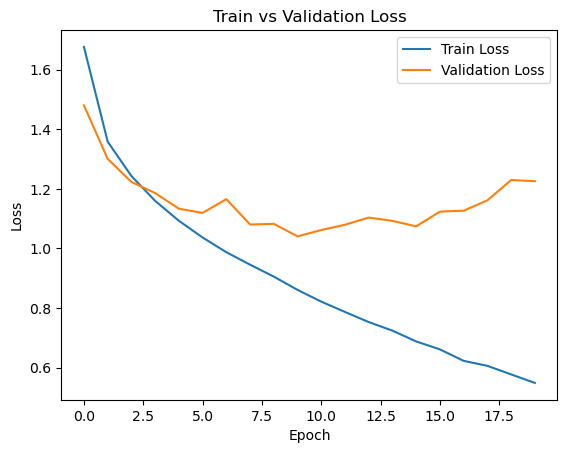

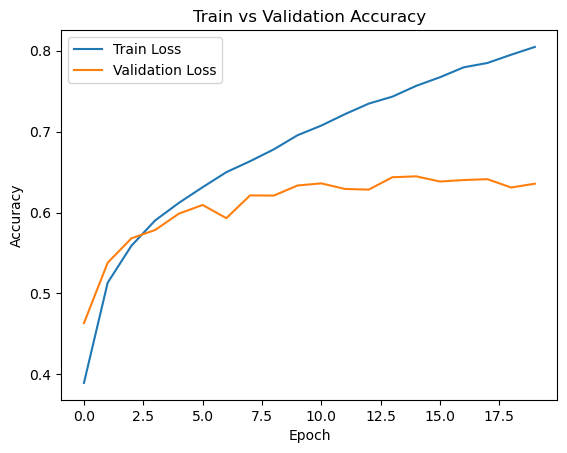

In [68]:
#Your code here
plt.plot(training_hist.history['loss'], label='Train Loss')
plt.plot(training_hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

plt.plot(training_hist.history['accuracy'], label='Train Loss')
plt.plot(training_hist.history['val_accuracy'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()

In [69]:
#Your code here
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 1.2676 - accuracy: 0.6241
Test Accuracy: 62.41%


### 3.4 Overfitting
1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

#### 3.4.1 Dropout

In [113]:
#Your code here

from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(16, kernel_size=(5, 5), strides=1, padding='valid', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dropout(0.3),
    Dense(120, activation='relu'),
    Dropout(0.3),
    Dense(84, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
# model.summary()

# I didn't apply dropout between convolutional layers because I found this way (only apply to hidden dense layers) 
# yields better results on validation set.


In [114]:
#Your code here

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training_hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64)

Epoch 1/20
625/625 [==============================] - 8s 11ms/step - loss: 1.8270 - accuracy: 0.3201 - val_loss: 1.5648 - val_accuracy: 0.4330
Epoch 2/20
625/625 [==============================] - 7s 10ms/step - loss: 1.5614 - accuracy: 0.4359 - val_loss: 1.4100 - val_accuracy: 0.4876
Epoch 3/20
625/625 [==============================] - 7s 11ms/step - loss: 1.4605 - accuracy: 0.4741 - val_loss: 1.3041 - val_accuracy: 0.5331
Epoch 4/20
625/625 [==============================] - 7s 11ms/step - loss: 1.3855 - accuracy: 0.5024 - val_loss: 1.2483 - val_accuracy: 0.5647
Epoch 5/20
625/625 [==============================] - 7s 11ms/step - loss: 1.3349 - accuracy: 0.5267 - val_loss: 1.2023 - val_accuracy: 0.5799
Epoch 6/20
625/625 [==============================] - 7s 11ms/step - loss: 1.2970 - accuracy: 0.5382 - val_loss: 1.1682 - val_accuracy: 0.5830
Epoch 7/20
625/625 [==============================] - 7s 11ms/step - loss: 1.2567 - accuracy: 0.5518 - val_loss: 1.1326 - val_accuracy: 0.5993

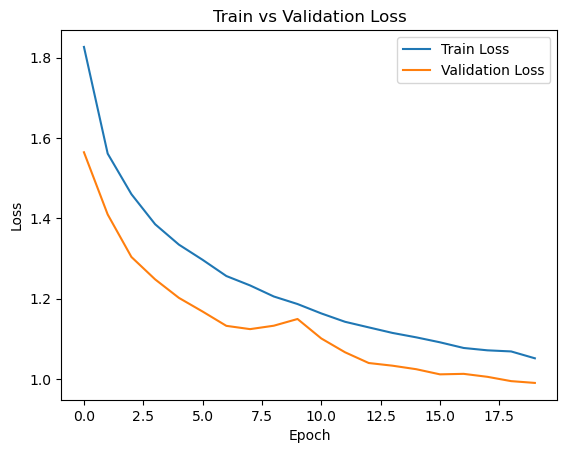

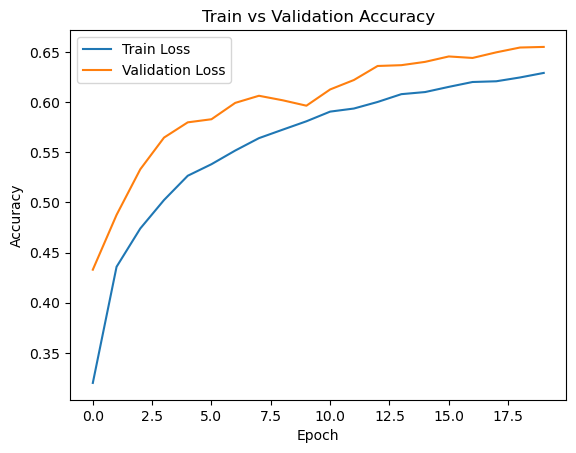

313/313 [==============================] - 1s 3ms/step - loss: 1.0030 - accuracy: 0.6496
Test Accuracy: 64.96%


In [115]:
#Your code here
plt.plot(training_hist.history['loss'], label='Train Loss')
plt.plot(training_hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

plt.plot(training_hist.history['accuracy'], label='Train Loss')
plt.plot(training_hist.history['val_accuracy'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

#### 3.4.2 Batch Normalization

In [106]:
#Your code here

from tensorflow.keras.layers import BatchNormalization, Input

model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    BatchNormalization(),
    Conv2D(16, kernel_size=(5, 5), strides=1, padding='valid', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    BatchNormalization(),
    Dense(120, activation='relu'),
    BatchNormalization(),
    Dense(84, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])
# model.summary()


In [107]:
#Your code here
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training_hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64)

Epoch 1/20
625/625 [==============================] - 9s 13ms/step - loss: 1.5849 - accuracy: 0.4330 - val_loss: 1.3568 - val_accuracy: 0.5156
Epoch 2/20
625/625 [==============================] - 8s 12ms/step - loss: 1.2651 - accuracy: 0.5482 - val_loss: 1.3171 - val_accuracy: 0.5359
Epoch 3/20
625/625 [==============================] - 8s 12ms/step - loss: 1.1425 - accuracy: 0.5907 - val_loss: 1.2047 - val_accuracy: 0.5745
Epoch 4/20
625/625 [==============================] - 8s 12ms/step - loss: 1.0501 - accuracy: 0.6263 - val_loss: 1.3333 - val_accuracy: 0.5359
Epoch 5/20
625/625 [==============================] - 8s 12ms/step - loss: 0.9764 - accuracy: 0.6534 - val_loss: 1.1629 - val_accuracy: 0.5934
Epoch 6/20
625/625 [==============================] - 8s 12ms/step - loss: 0.9194 - accuracy: 0.6720 - val_loss: 1.0953 - val_accuracy: 0.6197
Epoch 7/20
625/625 [==============================] - 8s 12ms/step - loss: 0.8631 - accuracy: 0.6915 - val_loss: 1.1882 - val_accuracy: 0.5966

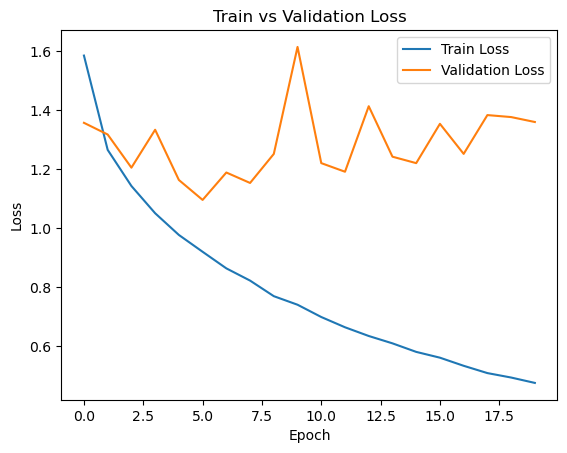

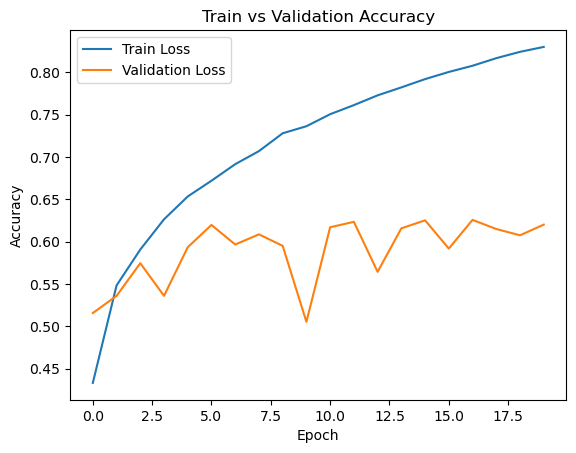

313/313 [==============================] - 1s 3ms/step - loss: 1.3392 - accuracy: 0.6184
Test Accuracy: 61.84%


In [108]:
#Your code here
plt.plot(training_hist.history['loss'], label='Train Loss')
plt.plot(training_hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

plt.plot(training_hist.history['accuracy'], label='Train Loss')
plt.plot(training_hist.history['val_accuracy'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
#Your comments here
# From my experiments, dropout significantly helps with overfitting as we can see validation accuracy 
# and training accuracy increase simultaneously during the training process, while in the original model
# they do not. Dropout also improves the overall model performance on validation and test set. Batchnorm 
# model compared with the original one, seems to stabilize and speed up training for a bit but has little 
# effect on addressing overfitting in this example. For above reason, I think the best way is dropout. 